In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns

data = pd.read_csv("D:\Projects\L3PP_AI_ML\data\Mumbai_House_Prices.csv")
data.head()

,bhk,type,locality,area,price,price_unit,region,status,age
0,3,Apartment,Lak And Hanware The Residency Tower,685,2.50,Cr,Andheri West,Ready to move,New
1,2,Apartment,Radheya Sai Enclave Building No 2,640,52.51,L,Naigaon East,Under Construction,New
2,2,Apartment,Romell Serene,610,1.73,Cr,Borivali West,Under Construction,New
3,2,Apartment,Soundlines Codename Urban Rainforest,876,59.98,L,Panvel,Under Construction,New
4,2,Apartment,Origin Oriana,659,94.11,L,Mira Road East,Under Construction,New


In [2]:
data = data[data['type'] == 'Apartment']
data = data[data['status'] == 'Ready to move']
data = data[data['bhk'] <= 3]
data.drop_duplicates(inplace=True)
data.loc[data['price_unit'] == 'Cr', 'price'] *= 100
data.drop(columns=['price_unit', 'status', 'age', 'locality', 'type'], inplace=True)

data.loc[data['region'].isin(['Andheri West', 'Andheri East', 'Santacruz East', 'Santacruz West', 'Mahim', 'Prabhadevi', 'Dadar West', 'Dadar East', 'Wadala', 'Lower Parel', 'Byculla', 'Marine Lines', 'Mazagaon', 'Worli', 'Churchgate', 'Kamathipura', 'Peddar Road', 'Shahapur', 'Babulnath Road', 'Malabar Hill', 'Tardeo', 'Girgaon', 'Cuffe Parade', 'Napeansea Road', 'Nalasopara East', 'Juhu', 'Powai']), 'region'] = 'Central Mumbai'
data.loc[data['region'].isin(['Bandra West', 'Bandra East', 'Borivali West', 'Borivali East', 'Kandivali West', 'Kandivali East', 'Malad West', 'Malad East', 'Sion', 'Goregaon West', 'Goregaon East', 'Versova', 'Vile Parle West', 'Vile Parle East', 'Andheri West', 'Andheri East']), 'region'] = 'Western Suburbs'
data.loc[data['region'].isin(['Ghatkopar West', 'Ghatkopar East', 'Kurla', 'Kurla East', 'Chembur', 'Bhandup East', 'Bhandup West', 'Mira Road', 'Mulund East', 'Mulund West', 'Kanjurmarg', 'Vikhroli East', 'Vikhroli West', 'Kalyan East', 'Kalyan West', 'Vasind', 'Navi Mumbai', 'Goregaon West', 'Vasai East', 'Kamothe']), 'region'] = 'Eastern Suburbs'
data.loc[data['region'].isin(['Navi Mumbai', 'Taloja', 'Ulwe', 'Kharghar', 'Panvel', 'Seawoods', 'Khopoli', 'Dombivli', 'Boisar', 'Tardeo', 'Vasai', 'Ghansoli', 'Koparkhairane', 'Airoli', 'Kharghar', 'Vashi', 'Sanpada']), 'region'] = 'Navi Mumbai & Beyond'
data.loc[data['region'].isin(['Badlapur', 'Badlapur East', 'Badlapur West', 'Nerul', 'Sector 21 Nerul', 'Dahisar', 'Vasai West', 'Sector 14 Vashi', 'Nalasopara West', 'Virar East', 'Virar West', 'Karjat', 'Shil Phata', 'Ambarnath', 'Ulhasnagar', 'Bhayandar East', 'Bhayandar West', 'Sewri', 'Mumbra', 'Taloje', 'Rasayani', 'Saphale', 'Kasheli', 'Uran', 'Palava', 'Vichumbe', 'Dombivali', 'Virar', 'Thane West', 'Mira Road East', 'Ambernath East']), 'region'] = 'Outskirts'
data = data[data['region'].isin(['Central Mumbai', 'Western Suburbs', 'Eastern Suburbs', 'Navi Mumbai & Beyond', 'Outskirts'])]

df_encoded = pd.get_dummies(data, columns=['region'], prefix='region')
df_encoded = pd.get_dummies(df_encoded, columns=['bhk'], prefix='bhk')
df_encoded = df_encoded.astype(int, errors='ignore')

data.to_csv('Mumbai_Filtered_Data.csv')
print(data.head())

df_encoded.head()

    bhk  area   price                region
0     3   685  250.00        Central Mumbai
8     1   396   29.84             Outskirts
17    3  1259  280.00  Navi Mumbai & Beyond
46    1   386   27.96  Navi Mumbai & Beyond
48    3  1625  145.00  Navi Mumbai & Beyond


,area,price,region_Central Mumbai,region_Eastern Suburbs,region_Navi Mumbai & Beyond,region_Outskirts,region_Western Suburbs,bhk_1,bhk_2,bhk_3
0,685,250,1,0,0,0,0,0,0,1
8,396,29,0,0,0,1,0,1,0,0
17,1259,280,0,0,1,0,0,0,0,1
46,386,27,0,0,1,0,0,1,0,0
48,1625,145,0,0,1,0,0,0,0,1


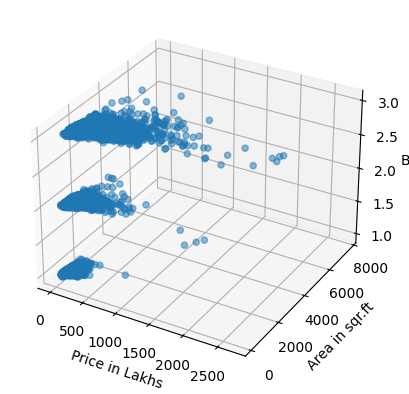

In [3]:
dataX = data['price']
dataY = data['area']
dataZ = data['bhk']

# Create a figure
fig = plt.figure()

# Add a 3D subplot
ax = fig.add_subplot(111, projection='3d')

# Create a scatter plot
scatter = ax.scatter(dataX, dataY, dataZ, alpha=0.5)

# Add labels
ax.set_xlabel('Price in Lakhs')
ax.set_ylabel('Area in sqr.ft')
ax.set_zlabel('BHK')

# Show the plot
plt.show()


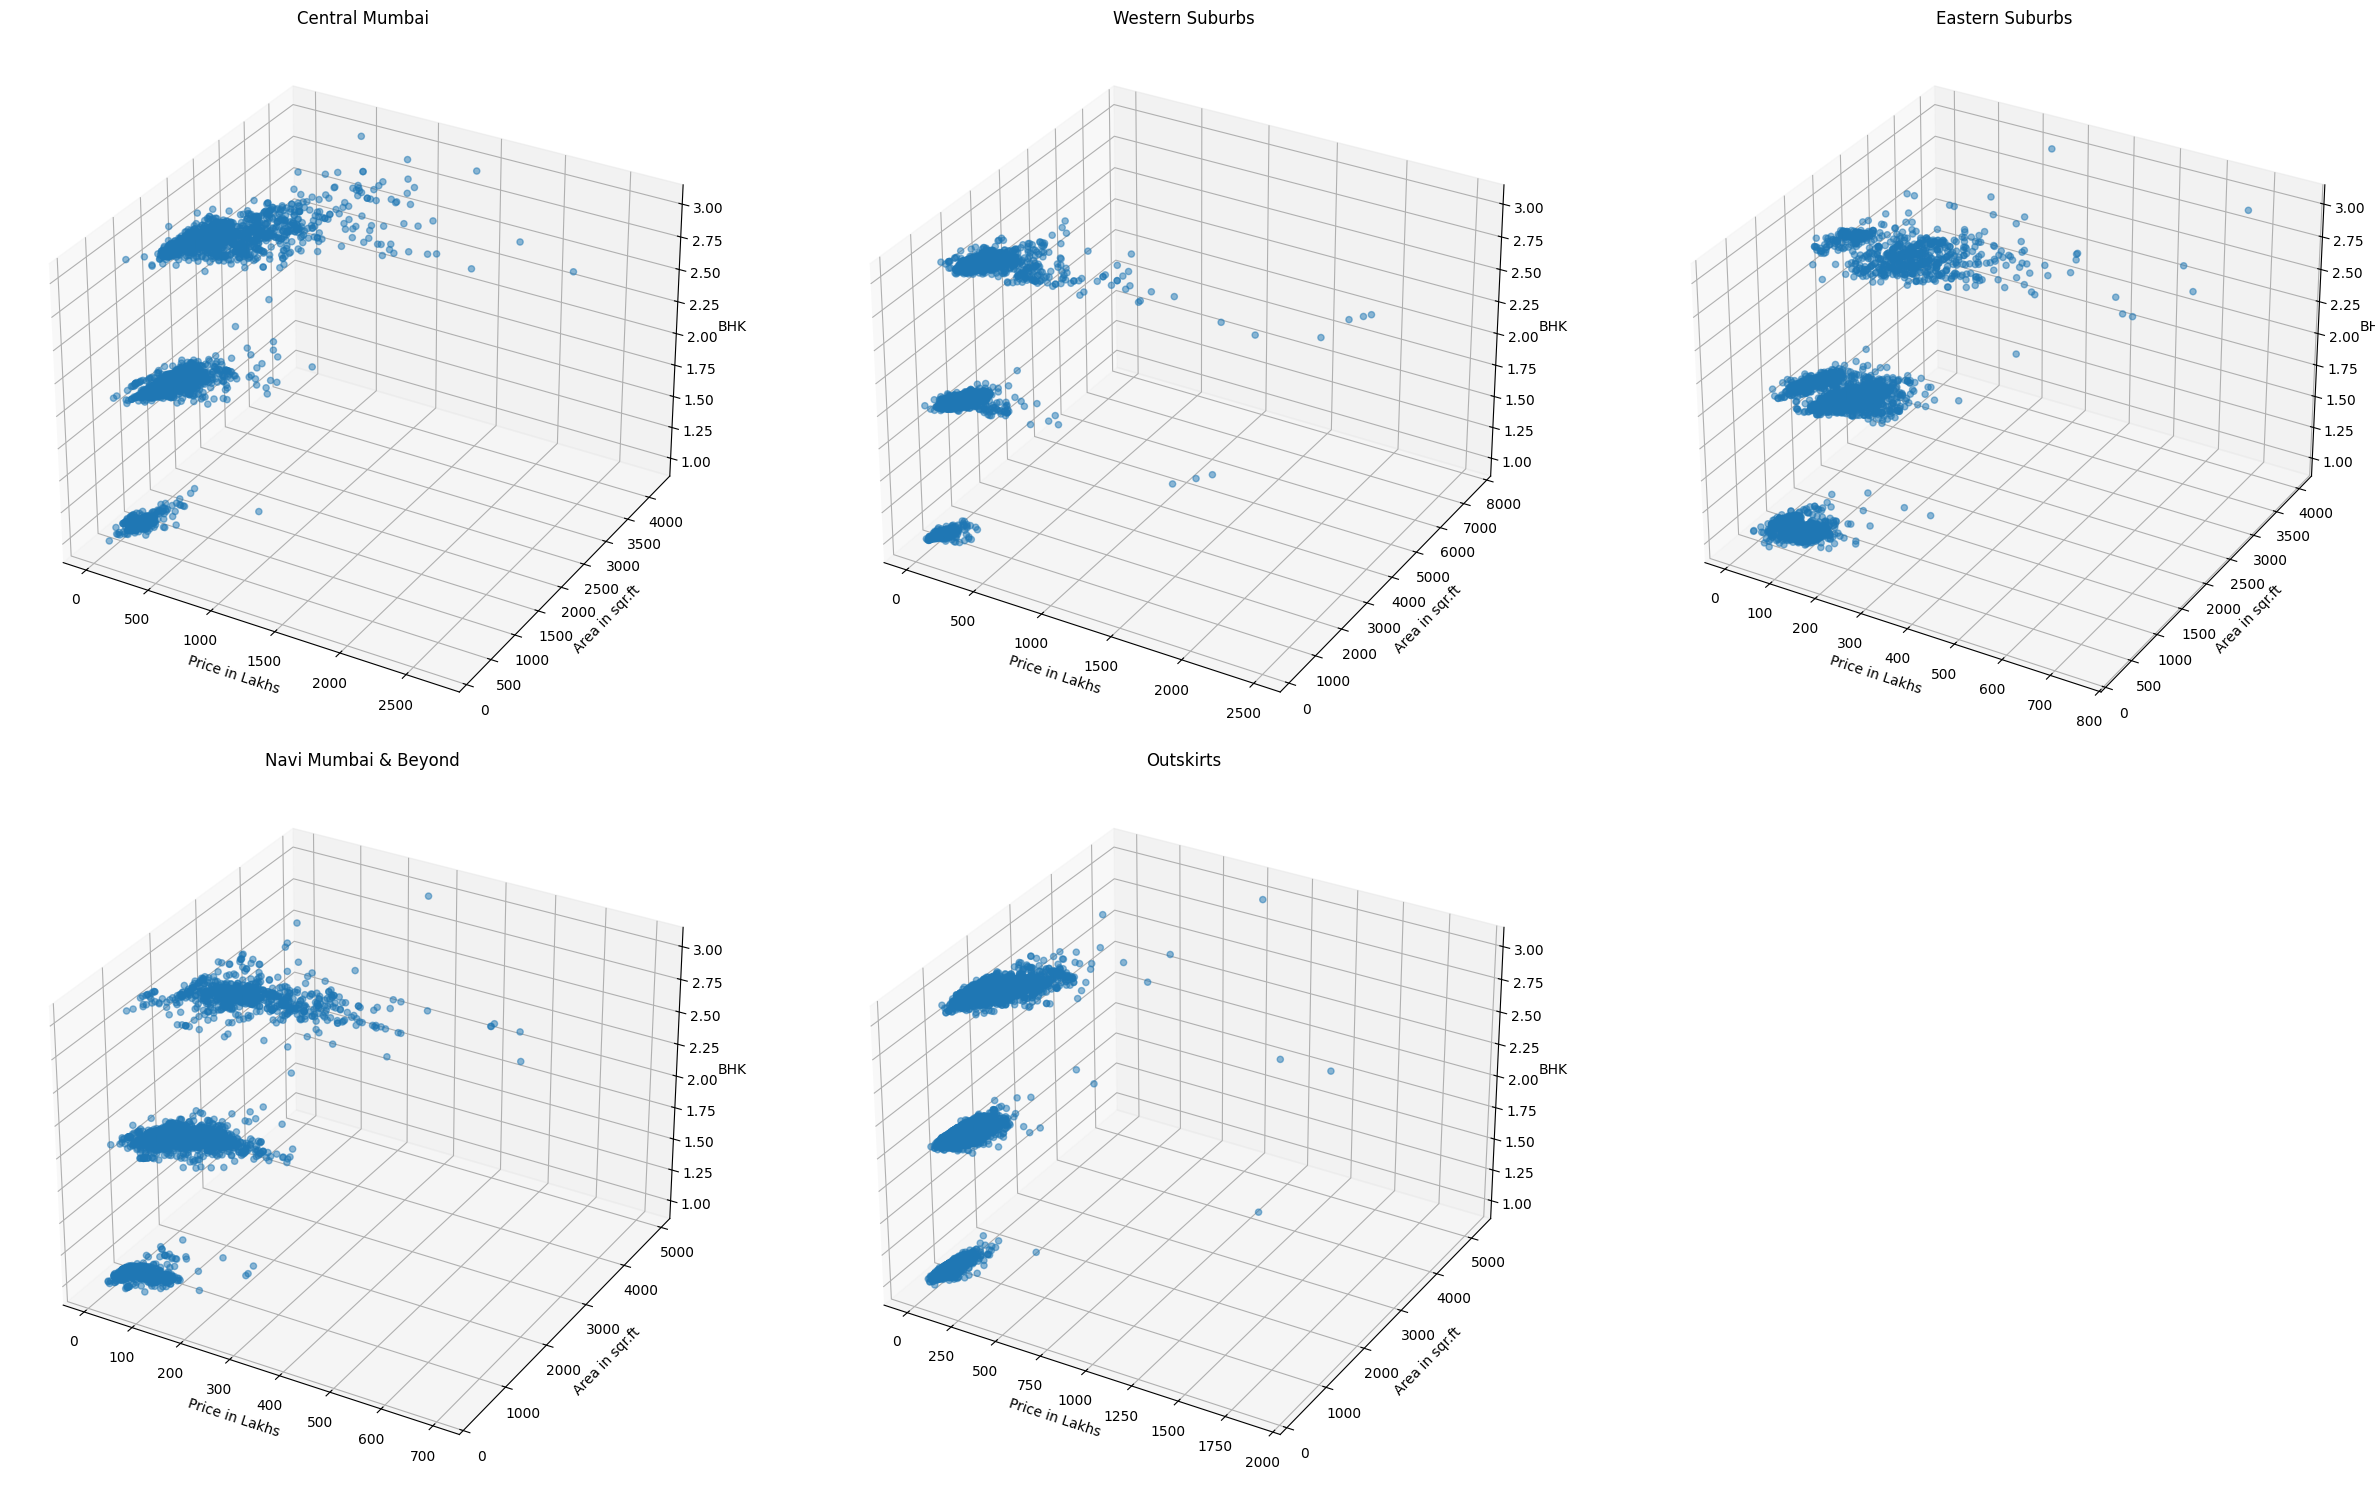

In [4]:
central_Mumbai = data[data['region'] == 'Central Mumbai']
western_Suburbs = data[data['region'] == 'Western Suburbs']
eastern_Suburbs = data[data['region'] == 'Eastern Suburbs']
navi_Mumbai = data[data['region'] == 'Navi Mumbai & Beyond']
outskirts = data[data['region'] == 'Outskirts']

total_data = [central_Mumbai, western_Suburbs, eastern_Suburbs, navi_Mumbai, outskirts]

# Create a figure with 3 horizontal & 2 vertical subplots
fig, axes = plt.subplots(2, 3, figsize=(25, 15), subplot_kw={'projection': '3d'})

# Region names for titles
region_names = ['Central Mumbai', 'Western Suburbs', 'Eastern Suburbs', 'Navi Mumbai & Beyond', 'Outskirts']

# Plot each region
for i, (data, title) in enumerate(zip(total_data, region_names)):
    row = i // 3
    col = i % 3
    scatters = axes[row, col].scatter(data['price'], data['area'], data['bhk'], alpha=0.5)
    axes[row, col].set_xlabel('Price in Lakhs')
    axes[row, col].set_ylabel('Area in sqr.ft')
    axes[row, col].set_zlabel('BHK')
    axes[row, col].set_title(title)

#Remove 6th empty plot
plt.delaxes(axes[1,2])
plt.tight_layout()
plt.show()

Degree: 1
MSE: 7255.20343237181
RMSE: 85.1774819560417
MAE: 47.49260997374293
R-squared: 0.6462608640997027
       Actual_Price  Predicted_Price  Difference
15227           136       125.643057  -10.356943
15987           166       286.493142  120.493142
52495           175       116.367412  -58.632588
44372           185       223.769610   38.769610
18370           237       241.168965    4.168965
26972            75       162.553072   87.553072
25458            38        33.709016   -4.290984
44355           268       269.323013    1.323013
74078           279       398.892193  119.892193
51509            52        50.098046   -1.901954


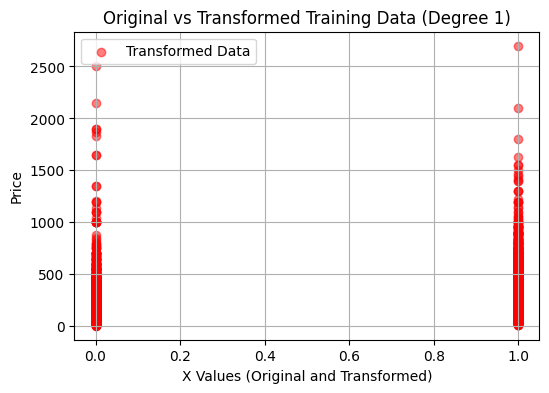

Degree: 2
MSE: 6027.295183582206
RMSE: 77.63565665067956
MAE: 41.44259664090034
R-squared: 0.7061295096780784
       Actual_Price  Predicted_Price  Difference
15227           136       107.865834  -28.134166
15987           166       255.822215   89.822215
52495           175       128.101064  -46.898936
44372           185       170.752139  -14.247861
18370           237       227.589495   -9.410505
26972            75        78.828435    3.828435
25458            38        51.964818   13.964818
44355           268       232.151883  -35.848117
74078           279       450.673315  171.673315
51509            52        55.863896    3.863896


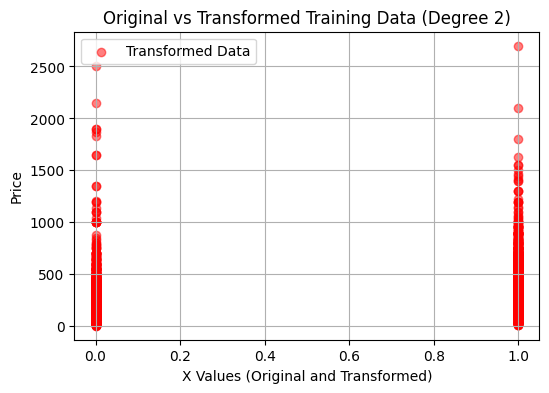

Degree: 3
MSE: 5963.728933734659
RMSE: 77.22518328715483
MAE: 41.120128789755015
R-squared: 0.7092287846333697
       Actual_Price  Predicted_Price  Difference
15227           136       107.934929  -28.065071
15987           166       252.454201   86.454201
52495           175       132.900041  -42.099959
44372           185       190.212278    5.212278
18370           237       225.136096  -11.863904
26972            75        91.530938   16.530938
25458            38        51.907247   13.907247
44355           268       234.317089  -33.682911
74078           279       449.296591  170.296591
51509            52        54.705897    2.705897


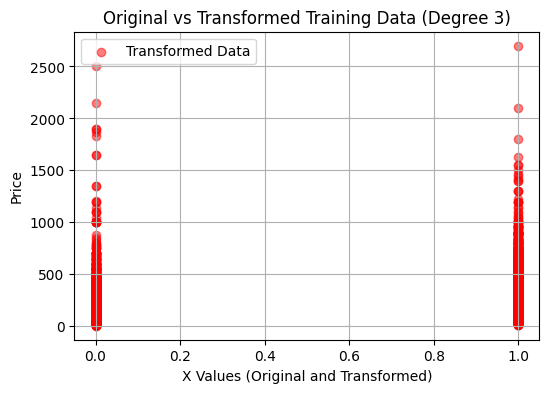

Degree: 4
MSE: 7090.086786707917
RMSE: 84.20265308592073
MAE: 47.76994225152335
R-squared: 0.654311392262606
       Actual_Price  Predicted_Price  Difference
15227           136        70.792018  -65.207982
15987           166       237.249278   71.249278
52495           175        63.712493 -111.287507
44372           185       158.124629  -26.875371
18370           237       218.112197  -18.887803
26972            75       191.063175  116.063175
25458            38        44.790793    6.790793
44355           268       213.124767  -54.875233
74078           279       442.326949  163.326949
51509            52        53.174096    1.174096


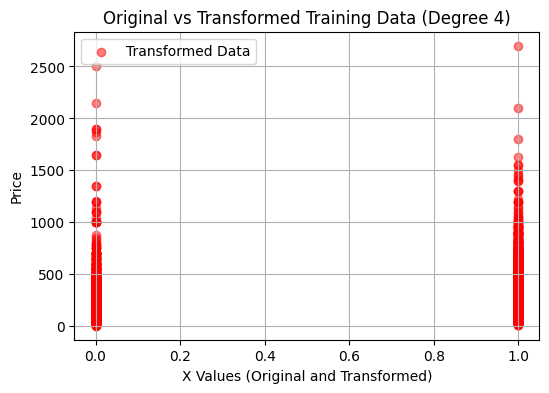

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, confusion_matrix, ConfusionMatrixDisplay, mean_absolute_error, r2_score
import numpy as np


Data_X = df_encoded.drop(columns=['price'])
Data_Y = df_encoded['price']

# Split data
X_train, X_test, y_train, y_test = train_test_split(Data_X, Data_Y, test_size=0.2, random_state=42)

for i in range(1,5):
    # Create Polynomial Features
    poly = PolynomialFeatures(degree=i, include_bias=False)  # Degree 2 means up to x², x₁x₂, etc.
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    # Train a Linear Regression model on the transformed features
    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    # Make predictions
    y_pred = model.predict(X_test_poly)

    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = mse**0.5  # or mse**(1/2)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Degree: {i}")
    print(f"MSE: {mse}")
    print(f"RMSE: {rmse}")
    print(f"MAE: {mae}")
    print(f"R-squared: {r2}")


    # Create DataFrame with both predictions and actual values
    comparison_df = pd.DataFrame({
        'Actual_Price': y_test[:10],
        'Predicted_Price': y_pred[:10]
    })

    comparison_df['Difference'] = comparison_df['Predicted_Price'] - comparison_df['Actual_Price']
    print(comparison_df)

    # Create plot for each degree
    plt.figure(figsize=(6, 4))
    
    # Plot original data
    plt.scatter(X_train.iloc[:, 0], y_train, color='blue', alpha=0.5, label='Original Data')
    
    # Plot transformed data
    plt.scatter(X_train_poly[:, 1], y_train, color='red', alpha=0.5, label='Transformed Data')
    
    plt.title(f'Original vs Transformed Training Data (Degree {i})')
    plt.xlabel('X Values (Original and Transformed)')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    plt.show()